<a href="https://colab.research.google.com/github/dimitarpg13/algorithmic_coding/blob/main/algorithmic_coding/classifiers/cart/classification_tree/notebooks/recursive_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive Classification Tree (CART) - Testing & Visualization

This notebook demonstrates and tests the recursive implementation of a Classification and Regression Tree (CART) for classification tasks.

## Contents
1. **Setup & Imports**
2. **Basic Classification Tests**
3. **Decision Boundary Visualization**
4. **Multiclass Classification**
5. **Hyperparameter Tuning Analysis**
6. **Comparison with scikit-learn**


In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sys
import os


#from google.colab import drive
#drive.mount('/content/drive')


# clone the repo if it does not exist
#! [ -d algorithmic_coding ] || git clone https://github.com/dimitarpg13/algorithmic_coding.git

%cd /content/

repo_url = "https://github.com/dimitarpg13/algorithmic_coding.git"
target_dir = "algorithmic_coding"

if not os.path.exists(target_dir):
    !git clone {repo_url}
else:
    print(f"Directory '{target_dir}' already exists. Skipping clone.")


%cd algorithmic_coding/

repo_dir = os.getcwd()

# Add the directory to the Python path
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# Add parent directories to path for imports
#sys.path.insert(0, '../../../../..')

from classifiers.cart.classification_tree.recursive_implementation import ClassificationTree

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Color palettes
COLORS_LIGHT = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA']
COLORS_DARK = ['#E74C3C', '#27AE60', '#3498DB', '#F39C12']

print("✓ Setup complete!")


/content
Directory 'algorithmic_coding' already exists. Skipping clone.
/content/algorithmic_coding
✓ Setup complete!


---
## 1. Basic Classification Tests

Let's start with simple tests to verify the classifier works correctly.


In [23]:
# Test 1: Simple linearly separable data
print("Test 1: Linearly Separable Binary Classification")
print("=" * 50)

X_simple = np.array([
    [1, 2], [2, 3], [3, 1], [4, 2],  # Class 0
    [6, 7], [7, 8], [8, 6], [9, 7]   # Class 1
])
y_simple = np.array([0, 0, 0, 0, 1, 1, 1, 1])

clf = ClassificationTree(max_depth=5)
clf.fit(X_simple, y_simple)

print(f"Training accuracy: {clf.score(X_simple, y_simple):.2%}")
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")
print(f"\nPredictions: {clf.predict(X_simple)}")
print(f"True labels: {y_simple}")


Test 1: Linearly Separable Binary Classification
Training accuracy: 100.00%
Tree depth: 1
Number of leaves: 2

Predictions: [0 0 0 0 1 1 1 1]
True labels: [0 0 0 0 1 1 1 1]


In [24]:
# Test 2: Probability predictions
print("\nTest 2: Probability Predictions")
print("=" * 50)

proba = clf.predict_proba(X_simple)
print("Class probabilities (first 4 samples):")
print(f"  Sample 0: P(class=0)={proba[0, 0]:.2f}, P(class=1)={proba[0, 1]:.2f}")
print(f"  Sample 4: P(class=0)={proba[4, 0]:.2f}, P(class=1)={proba[4, 1]:.2f}")



Test 2: Probability Predictions
Class probabilities (first 4 samples):
  Sample 0: P(class=0)=1.00, P(class=1)=0.00
  Sample 4: P(class=0)=0.00, P(class=1)=1.00


---
## 2. Decision Boundary Visualization

Visualize how the tree partitions the feature space.


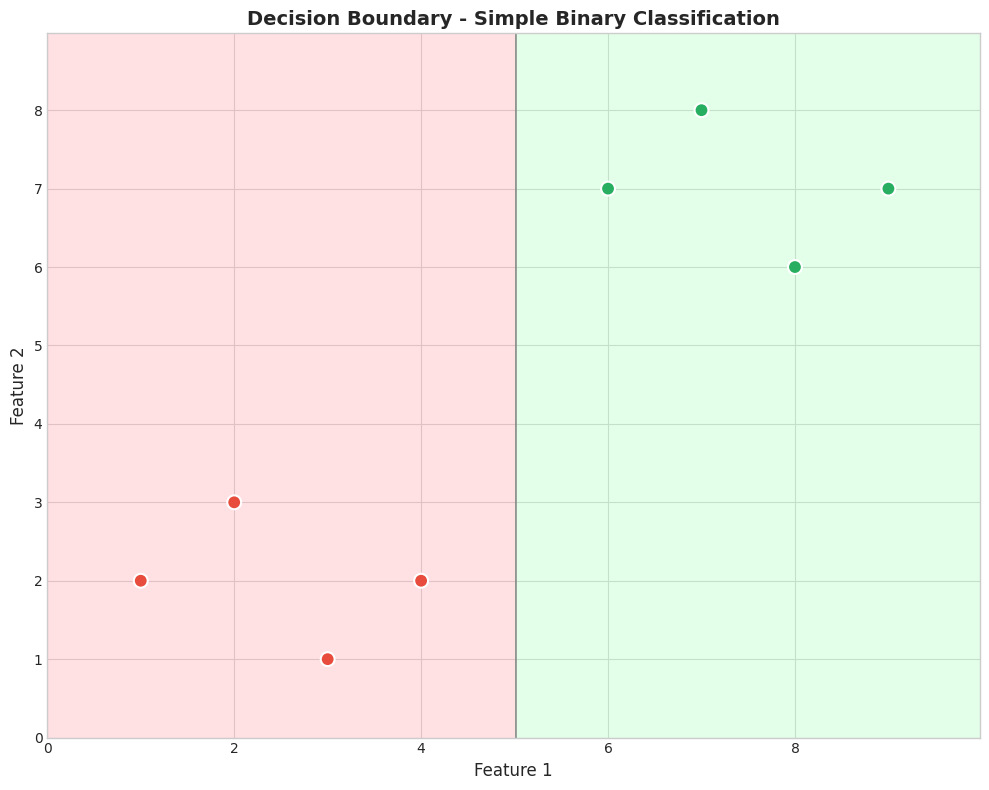

In [25]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", ax=None):
    """
    Plot the decision boundary of a classifier along with training data.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Create mesh grid
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Get number of classes
    n_classes = len(np.unique(y))
    cmap_light = ListedColormap(COLORS_LIGHT[:n_classes])
    cmap_dark = ListedColormap(COLORS_DARK[:n_classes])

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    ax.contour(xx, yy, Z, colors='gray', linewidths=0.5, alpha=0.5)

    # Plot training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dark,
                         edgecolors='white', s=100, linewidths=1.5)

    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    return ax

# Visualize simple classification
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundary(clf, X_simple, y_simple,
                      title="Decision Boundary - Simple Binary Classification", ax=ax)
plt.tight_layout()
plt.show()


### 2.1 Gaussian Clusters Dataset


In [26]:
# Generate Gaussian clusters
np.random.seed(42)

n_samples = 100
mean_0 = [2, 2]
mean_1 = [6, 6]
cov = [[1, 0.5], [0.5, 1]]

X_0 = np.random.multivariate_normal(mean_0, cov, n_samples)
X_1 = np.random.multivariate_normal(mean_1, cov, n_samples)

X_gauss = np.vstack([X_0, X_1])
y_gauss = np.array([0] * n_samples + [1] * n_samples)

# Shuffle data
shuffle_idx = np.random.permutation(len(y_gauss))
X_gauss = X_gauss[shuffle_idx]
y_gauss = y_gauss[shuffle_idx]

# Split train/test
split = int(0.8 * len(y_gauss))
X_train, X_test = X_gauss[:split], X_gauss[split:]
y_train, y_test = y_gauss[:split], y_gauss[split:]

# Fit classifier
clf_gauss = ClassificationTree(max_depth=5)
clf_gauss.fit(X_train, y_train)

print("Gaussian Clusters Dataset")
print("=" * 50)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Training accuracy: {clf_gauss.score(X_train, y_train):.2%}")
print(f"Test accuracy: {clf_gauss.score(X_test, y_test):.2%}")
print(f"Tree depth: {clf_gauss.get_depth()}")
print(f"Number of leaves: {clf_gauss.get_n_leaves()}")


Gaussian Clusters Dataset
Training samples: 160
Test samples: 40
Training accuracy: 100.00%
Test accuracy: 97.50%
Tree depth: 3
Number of leaves: 4


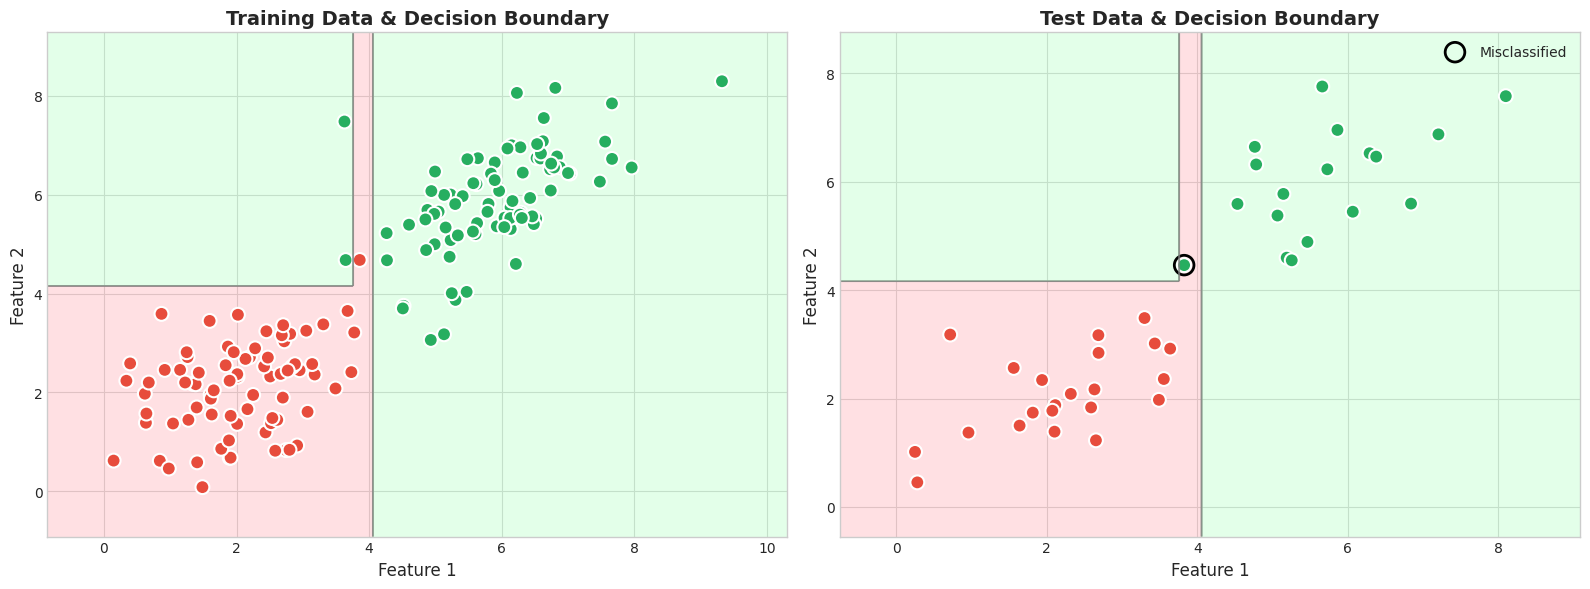

In [27]:
# Visualize Gaussian clusters with decision boundary
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training data
plot_decision_boundary(clf_gauss, X_train, y_train,
                      title="Training Data & Decision Boundary", ax=axes[0])

# Test data
plot_decision_boundary(clf_gauss, X_test, y_test,
                      title="Test Data & Decision Boundary", ax=axes[1])

# Mark misclassified points on test set
y_pred = clf_gauss.predict(X_test)
misclassified = y_pred != y_test
if misclassified.any():
    axes[1].scatter(X_test[misclassified, 0], X_test[misclassified, 1],
                   facecolors='none', edgecolors='black', s=200, linewidths=2,
                   label='Misclassified')
    axes[1].legend()

plt.tight_layout()
plt.show()
